<a href="https://colab.research.google.com/github/Katie-Moses/DSPS_KMoses/blob/main/HW8/KMoses_higgsbosonSearch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#imports
import pandas as pd
import numpy as np
import pylab as plt
import os
import json

In [2]:
#mount your google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Remember tasks are not completed if you do not comment on the results and include captions

# Task 1 : data ingestion

- Download the Higgs boson data from Kaggle (programmatically within the notebook)

see how I did it in the Titanic Trees notebook https://github.com/fedhere/DSPS_FBianco/blob/main/CodeDemos/titanictree.ipynb

find the correct API link here https://www.kaggle.com/c/higgs-boson/data. The command is `!kaggle competitions download......` (you may need to agree to the terms of condition of the higgs boson challenge on the kaggle webpage)


In [3]:
cd drive/MyDrive

/content/drive/MyDrive


In [4]:
ls kaggle.json

kaggle.json


In [5]:
envs = json.load(open("kaggle.json", "r"))
os.environ["KAGGLE_USERNAME"] = envs['username']
os.environ["KAGGLE_KEY"] = envs['key']

In [6]:
# i suggest you put the data in a folder inside of your dsps folder, which you should already have
# !mkdir kaggleHiggs

In [7]:
cd kaggleHiggs/

/content/drive/MyDrive/kaggleHiggs


In [8]:
#!kaggle competitions download -c higgs-boson

In [9]:
# !unzip higgs-boson.zip

In [10]:
!ls

HiggsBosonCompetition_AMSMetric_rev1.py  random_submission.zip	training.zip
higgs-boson.zip				 test.zip


In [11]:
#use the training dataset and make your own trainng test set later
higgsdata = pd.read_csv("training.zip")

# Task 2: data exploration

In [12]:
higgsdata.head()

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight,Label
0,100000,138.470,51.655,97.827,27.980,0.91,124.711,2.666,3.064,41.928,...,2,67.435,2.150,0.444,46.062,1.24,-2.475,113.497,0.002653,s
1,100001,160.937,68.768,103.235,48.146,-999.00,-999.000,-999.000,3.473,2.078,...,1,46.226,0.725,1.158,-999.000,-999.00,-999.000,46.226,2.233584,b
2,100002,-999.000,162.172,125.953,35.635,-999.00,-999.000,-999.000,3.148,9.336,...,1,44.251,2.053,-2.028,-999.000,-999.00,-999.000,44.251,2.347389,b
3,100003,143.905,81.417,80.943,0.414,-999.00,-999.000,-999.000,3.310,0.414,...,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,-0.000,5.446378,b
4,100004,175.864,16.915,134.805,16.405,-999.00,-999.000,-999.000,3.891,16.405,...,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000,6.245333,b


In [13]:
higgsdata.describe()

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight
count,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,...,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000
mean,224999.500000,-49.023079,49.239819,81.181982,57.895962,-708.420675,-601.237051,-709.356603,2.373100,18.917332,...,209.797178,0.979176,-348.329567,-399.254314,-399.259788,-692.381204,-709.121609,-709.118631,73.064591,1.646767
std,72168.927986,406.345647,35.344886,40.828691,63.655682,454.480565,657.972302,453.019877,0.782911,22.273494,...,126.499506,0.977426,532.962789,489.338286,489.333883,479.875496,453.384624,453.389017,98.015662,1.875103
min,100000.000000,-999.000000,0.000000,6.329000,0.000000,-999.000000,-999.000000,-999.000000,0.208000,0.000000,...,13.678000,0.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,0.000000,0.001502
25%,162499.750000,78.100750,19.241000,59.388750,14.068750,-999.000000,-999.000000,-999.000000,1.810000,2.841000,...,123.017500,0.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-0.000000,0.018636
50%,224999.500000,105.012000,46.524000,73.752000,38.467500,-999.000000,-999.000000,-999.000000,2.491500,12.315500,...,179.739000,1.000000,38.960000,-1.872000,-2.093000,-999.000000,-999.000000,-999.000000,40.512500,1.156188
75%,287499.250000,130.606250,73.598000,92.259000,79.169000,0.490000,83.446000,-4.593000,2.961000,27.591000,...,263.379250,2.000000,75.349000,0.433000,0.503000,33.703000,-2.457000,-2.275000,109.933750,2.404128
max,349999.000000,1192.026000,690.075000,1349.351000,2834.999000,8.503000,4974.979000,16.690000,5.684000,2834.999000,...,2003.976000,3.000000,1120.573000,4.499000,3.141000,721.456000,4.500000,3.142000,1633.433000,7.822543


do everything else you need to explore the data.... (I can think of 4 more things we have done together)

In [14]:
higgsdata.shape

(250000, 33)

# Task 3: data preparation


- Read in the trained data. Extract the target variables. Split the provided training data into a training and a test set.

The last 2 columns are what you want to predict: "weight" and "label".
Remove them from the input data (along any other variable you should remove) and create a separate variable `labels` and a separate variable `weights`, which will be your target variables for, respectively, classification and regression.



 you will use two target variables (you can read more about the data at https://higgsml.lal.in2p3.fr/files/2014/04/documentation_v1.8.pdf): find the corresponding columns of the DF and save them as labels and weights respectively

In [15]:
labels = []
i=0
for item in higgsdata["Label"]:
  labels.append(higgsdata["Label"][i])
  i+=1

In [16]:
labels = np.array(labels)
labels # 's' stands for signal, 'b' for background. You want to find new particles, i.e. "signal"

array(['s', 'b', 'b', ..., 's', 'b', 'b'], dtype='<U1')

In [17]:
weights = []
i=0
for item in higgsdata["Weight"]:
  weights.append(higgsdata["Weight"][i])
  i+=1

In [18]:
weights = np.array(weights)
weights # the weight of the particle

array([0.00265331, 2.23358449, 2.34738894, ..., 0.01863612, 1.68161144,
       1.87747381])

In [19]:
higgsdata["Label_num"] = higgsdata["Label"].map({"s":0, "b":1})
higgs_short = higgsdata[["Label_num","Weight"]]

In [20]:
# Create a new DataFrame excluding 'Label' and 'Label_num', modified from Gemini generated code
higgs_labelless = higgsdata.drop(["Label", "Label_num"], axis=1)
higgs_weightless = higgsdata.drop(["Label","Weight"],axis=1)

In [21]:
higgs_short.shape

(250000, 2)

use the "training.csv" file, but create your own train/test sets

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
train_x, test_x, train_y, test_y = train_test_split(higgs_labelless, higgsdata["Label_num"], train_size=0.75, shuffle=True, random_state=661)

In [24]:
train_x.shape, test_x.shape, train_y.shape, test_y.shape

((187500, 32), (62500, 32), (187500,), (62500,))

In [25]:
train_regress_x, test_regress_x, train_regress_y, test_regress_y = train_test_split(higgs_weightless, higgsdata["Weight"], train_size=0.75, shuffle=True, random_state=661)

In [26]:
train_regress_x.shape, test_regress_x.shape, train_regress_y.shape, test_regress_y.shape

((187500, 32), (62500, 32), (187500,), (62500,))

#Task 4: answer the question (you, not an AI...) why did I not ask you to scale the data like we did in the cluster models?

We do not need to scale the data as trees partiton into groups which are arbitrarily designated based on the data, unlike clusters which divide based on their distance. As such, clusters should be scaled to be uniform, but trees do not need this as paritioning does not need a scaled dataset.

# Task 5: tree-based classifications

Use a Random Forest and a Gradiend Boosted Tree Classifier model to predict the `label` of the particles, i.e. if a particle is `Signal` or `Background`. Get the score of each model on both the training and test set, compare them training and test results and comment on the result for each model (adjust the hyperparameters if you need to)


In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [28]:
# Look at parameters used by our current forest
rf = RandomForestClassifier(random_state = 661)
print('Parameters currently in use:\n')
print(rf.get_params())

Parameters currently in use:

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 661, 'verbose': 0, 'warm_start': False}


In [29]:
#now control some hyperparameters
rf = RandomForestClassifier(max_depth=2, n_estimators=100, n_jobs=-1, random_state=661)
print(rf.get_params())

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 2, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 100, 'n_jobs': -1, 'oob_score': False, 'random_state': 661, 'verbose': 0, 'warm_start': False}


In [30]:
gbt = GradientBoostingClassifier(random_state=661, max_depth=2, n_estimators=100)
print(gbt.get_params())

{'ccp_alpha': 0.0, 'criterion': 'friedman_mse', 'init': None, 'learning_rate': 0.1, 'loss': 'log_loss', 'max_depth': 2, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_iter_no_change': None, 'random_state': 661, 'subsample': 1.0, 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}


In [31]:
rf.fit(train_x,train_y)

RandomForestClassifier(max_depth=2, n_jobs=-1, random_state=661)

In [32]:
gbt.fit(train_x,train_y)

GradientBoostingClassifier(max_depth=2, random_state=661)

# Task 6: model evaluation

calculate the  scores for the training and test sets and compare etc

In [33]:
print(f"the RF scores on the training test is {rf.score(train_x,train_y):.2%}, on the test is {rf.score(test_x,test_y):.2%}")
print("this indicates a potential overfitting to the data, given the high scores, but the model does well at classifying the test dataset correctly")
print(f"the GBT scores on the training test is {gbt.score(train_x,train_y):.2%}, on the test is {gbt.score(test_x,test_y):.2%}")
print("this indicates strong overfitting of the data, and I could not figure out why")


the RF scores on the training test is 97.11%, on the test is 97.22%
this indicates a potential overfitting to the data, given the high scores, but the model does well at classifying the test dataset correctly
the GBT scores on the training test is 100.00%, on the test is 100.00%
this indicates strong overfitting of the data, and I could not figure out why


**Comment** is your model performing well? is it .... overfitting?

>The RF model may be overfitting the data. The GBT model is definitely overfitting the data, and I'm not sure why.

- Produce a confusion matrix for each model and compare them






In [34]:
from sklearn.metrics import confusion_matrix
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [35]:
# I creaded this function (mostly copied from sklearn examples).
# You can use it to create the confusion matrix, make sure you pass appropriate label

def plot_confusion_matrix(y_true, y_pred,
                          normalize=False,
                          title='', labels=["P", "N"],
                          cmap=plt.cm.bone):
    """
    Plots a confusion matrix.

    Args:
        y_true (array-like): True labels.
        y_pred (array-like): Predicted labels.
        normalize (bool, optional): If True, normalize the confusion matrix. Defaults to False.
        title (str, optional): Title of the plot. Defaults to ''.
        labels (list, optional): List of labels for the classes. Defaults to ["P", "N"].
        cmap (matplotlib.colors.Colormap, optional): Colormap for the plot. Defaults to plt.cm.bone.
    """
    if normalize:
          title = title + ' Normalized confusion matrix'
    else:
          title = title + ' Confusion matrix, without normalization'
    # Compute confusion matrix
    if normalize:
      cm = confusion_matrix(y_true, y_pred, normalize='all')
    else:
      cm = confusion_matrix(y_true, y_pred)
    # plot it
    fig, ax = plt.subplots(1, 1)
    fig.subplots_adjust()
    im = ax.imshow(np.rot90(cm), cmap=cmap)
    ax_divider = make_axes_locatable(ax)
    # add an axes to the right of the main axes.
    plt.xticks([0, 1], labels=labels[::-1])

    plt.text(0,1, cm[0,0], ha='center', c="k" if cm[0,0] > 0.1 * cm.sum() else "w")
    plt.text(0,0, cm[0,1], ha='center', c="k" if cm[0,1] > 0.1 * cm.sum() else "w")
    plt.text(1,1, cm[1,0], ha='center', c="k" if cm[1,0] > 0.1 * cm.sum() else "w")
    plt.text(1,0, cm[1,1], ha='center', c="k" if cm[1,1] > 0.1 * cm.sum() else "w")
    plt.ylim(-0.5,1.5)
    plt.yticks([0,1], labels=labels)
    plt.xlabel("prediction")
    plt.ylabel("truth")
    plt.title(title)
    cax = ax_divider.append_axes("right", size="10%", pad="2%")
    cb = plt.colorbar(im, cax=cax)

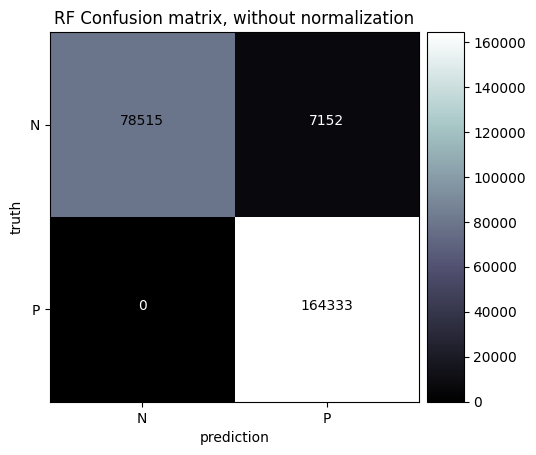

In [54]:
#for RF
plot_confusion_matrix(rf.predict(higgs_labelless),
                      higgsdata["Label_num"],title="RF")

> Figure 1: Confusion matrix for the rf model for identifying the label of an event from the dataset. The model is extremely good at identifying the data, with a small fraction of false positives and no false negatives. There is likely some overfitting in the model as a result.

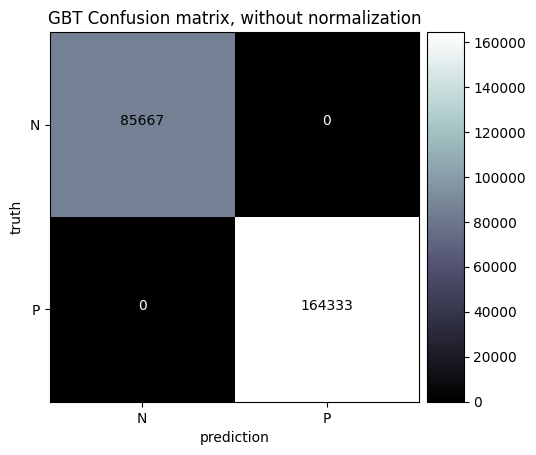

In [55]:
plot_confusion_matrix(gbt.predict(higgs_labelless),
                      higgsdata["Label_num"],title="GBT")

> Figure 2: Confusion matrix for the gbt model for identifying the label of an event from the dataset. This model is clearly overfitted due to have perfect accuracy on the entire data set.

Plot a simple ROC curve for the RF and GBT models and describe it in a caption.

In [38]:
#this will be passed to the ROC function
#test_y.reshape(-1, 1).flatten() == "s"

AttributeError: 'Series' object has no attribute 'reshape'

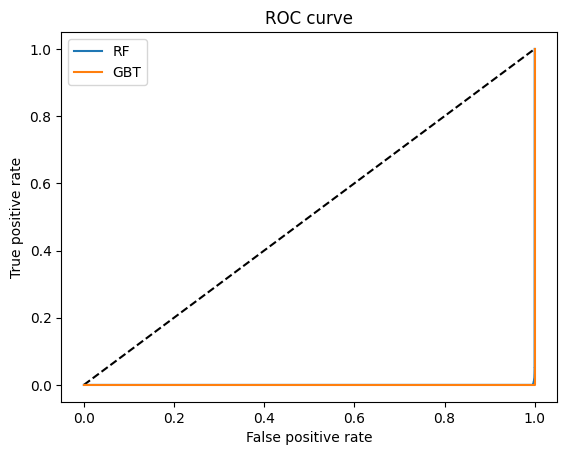

In [39]:
# The random forest model by itself
from sklearn.metrics import roc_curve

y_pred_grd_rfcat = rf.predict_proba(test_x)[:, 1]
y_pred_grd_gbtcat = gbt.predict_proba(test_x)[:, 1]

fpr_rf, tpr_rf, _ = roc_curve(test_y == 0, y_pred_grd_rfcat) # Assuming 0 represents 's'
fpr_gbt, tpr_gbt, _ = roc_curve(test_y == 0, y_pred_grd_gbtcat) # Assuming 0 represents 's'

plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rf, tpr_rf, label='RF')
plt.plot(fpr_gbt, tpr_gbt, label='GBT')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

>Figure 3: What is supposed to be an ROC curve, but something is wrong and I do not know how to fix it.



#Task 7 required for 661, EC for 461, tree-based regression


- Use a Random Forest and a Gradiend Boosted Tree Regressor model to predict the weight of the particles. Compare the model performance on training and test sets


In [40]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [41]:
rfR = RandomForestRegressor(max_depth=3, random_state=302)
rfR.fit(train_regress_x, train_regress_y)

RandomForestRegressor(max_depth=3, random_state=302)

In [42]:
rfR2 = RandomForestRegressor(max_depth=10, random_state=302)
rfR2.fit(train_regress_x, train_regress_y)

RandomForestRegressor(max_depth=10, random_state=302)

In [43]:
gbtR = GradientBoostingRegressor(max_depth=8, random_state=302)
gbtR.fit(train_regress_x, train_regress_y)

GradientBoostingRegressor(max_depth=8, random_state=302)

In [44]:
print(f"the RF scores on the training test is {rfR2.score(train_regress_x,train_regress_y):.2%}, on the test is {rfR2.score(test_regress_x,test_regress_y):.2%}")
print("this indicates a decent model for the data, but more training could improve the result")
print(f"the GBT scores on the training test is {gbtR.score(train_regress_x,train_regress_y):.2%}, on the test is {gbtR.score(test_regress_x,test_regress_y):.2%}")
print("this also indicates a decent model for the data, but overfitting is likely if further training is conducted")

the RF scores on the training test is 80.94%, on the test is 79.37%
this indicates a decent model for the data, but more training could improve the result
the GBT scores on the training test is 83.16%, on the test is 80.07%
this also indicates a decent model for the data, but overfitting is likely if further training is conducted


 Calculate the L2 and L1 loss functions for the fitted regression models (see slides for the definition) and discuss the results

In [45]:
def L1(target_arr, prediction_arr):
  sum = 0
  for i in range(len(target_arr)):
    sum += np.abs(target_arr.values[i] - prediction_arr[i])
  return sum

def L2(target_arr, prediction_arr):
  sum = 0
  for i in range(len(target_arr)):
    sum += (target_arr.values[i] - prediction_arr[i])**2
  return sum

In [46]:
print(f"L1 RF {L1(test_regress_y,  rfR.predict(test_regress_x)):.2f}, L2 RF {L2(test_regress_y, rfR.predict(test_regress_x)):.2f}")

L1 RF 38718.86, L2 RF 63940.92


In [47]:
print(f"L1 GBT {L1(test_regress_y,  gbtR.predict(test_regress_x)):.2f}, L2 GBT {L2(test_regress_y, gbtR.predict(test_regress_x)):.2f}")

L1 GBT 30778.95, L2 GBT 43503.13


**Discuss!**

> As seen from the loss functions, there is a degree of error with both models in that not all values will be predicted correctly. Given the size of the datasets, the error values are not that bad. Also, the GBT model is a much better fit compared to the RF model, using both mean square error (L2) and mean absolute error (L1) to test for loss.

#Task 8: Choose between feature importance and grid optimization (due for both 461 and 661)







# Task 8a: feature importance
Use the "Titanic notebook" as a guide for the feature importance analysis  https://github.com/fedhere/DSPS_FBianco/blob/main/Labs/DSPS_2025_titanictree.ipynb

- For the Random Forest classifier, find the 4 most important features based on the simple unoptimized model you created earlier on. Use the documentation to find out what they are. We have not talked abotu the physics of this problem at all but the Kaggle challenge description should provide enogh information for you to comment on this result is somewhat superficially.

You can use ```rf.feature_importance_``` on the trained model to extract the relative importance of each feature (a number from 0 to 1) and then choose the features that have the 4 highest numbers (the numpy function ```argsort()``` is helpful here!)

(your features may looks slightly different than mine)

In [48]:
# Get feature importances from the trained Random Forest model
feature_importances = rf.feature_importances_

# Get the indices of features sorted by importance in descending order
sorted_indices = np.argsort(feature_importances)[::-1]

In [49]:
best_features_index = np.std([tree.feature_importances_ for tree in rf.estimators_],axis=0)

In [50]:
higgsdata.drop(["EventId", "Label", "Weight"], axis=1).iloc[:, best_features_index[::-1]] #this sorts the data by feature

,DER_mass_MMC,DER_mass_MMC,DER_mass_MMC,DER_mass_MMC,DER_mass_MMC,DER_mass_MMC,DER_mass_MMC,DER_mass_MMC,DER_mass_MMC,DER_mass_MMC,...,DER_mass_MMC,DER_mass_MMC,DER_mass_MMC,DER_mass_MMC,DER_mass_MMC,DER_mass_MMC,DER_mass_MMC,DER_mass_MMC,DER_mass_MMC,DER_mass_MMC
0,138.470,138.470,138.470,138.470,138.470,138.470,138.470,138.470,138.470,138.470,...,138.470,138.470,138.470,138.470,138.470,138.470,138.470,138.470,138.470,138.470
1,160.937,160.937,160.937,160.937,160.937,160.937,160.937,160.937,160.937,160.937,...,160.937,160.937,160.937,160.937,160.937,160.937,160.937,160.937,160.937,160.937
2,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,...,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000
3,143.905,143.905,143.905,143.905,143.905,143.905,143.905,143.905,143.905,143.905,...,143.905,143.905,143.905,143.905,143.905,143.905,143.905,143.905,143.905,143.905
4,175.864,175.864,175.864,175.864,175.864,175.864,175.864,175.864,175.864,175.864,...,175.864,175.864,175.864,175.864,175.864,175.864,175.864,175.864,175.864,175.864
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249995,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,...,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000
249996,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,...,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000
249997,105.457,105.457,105.457,105.457,105.457,105.457,105.457,105.457,105.457,105.457,...,105.457,105.457,105.457,105.457,105.457,105.457,105.457,105.457,105.457,105.457
249998,94.951,94.951,94.951,94.951,94.951,94.951,94.951,94.951,94.951,94.951,...,94.951,94.951,94.951,94.951,94.951,94.951,94.951,94.951,94.951,94.951


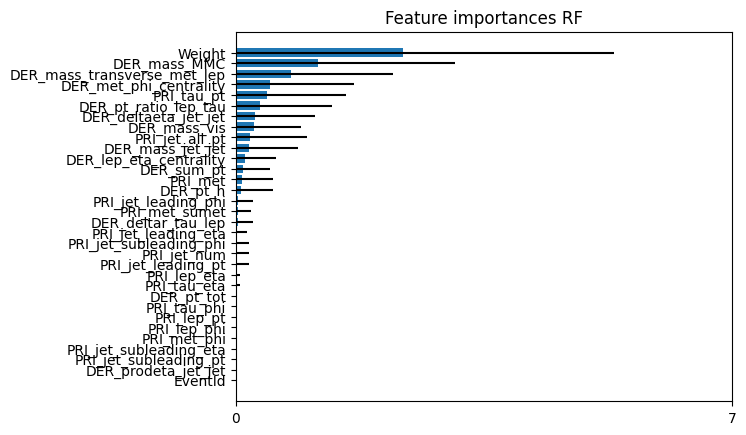

In [51]:
indices = np.argsort(rf.feature_importances_)
plt.figure()
plt.title("Feature importances RF")
plt.barh(np.arange(rf.feature_importances_.shape[0]),
        rf.feature_importances_[indices],
       xerr=best_features_index[indices], align="center")
plt.xticks(range(rf.feature_importances_.shape[0]), indices)
plt.yticks(range(rf.feature_importances_.shape[0]),
          labels=higgs_labelless.columns[indices])
plt.xlim(0, 1)
plt.show()

>Figure 4: Graph showcasing the overall importance of different parameters to the rf model and which are the most important in classifying the data. Weight and mass are clearly the most important, as they are some of the key data pieces that give away the presence of a potential particle (and this is true to the Higgs boson discovery). Many factors did not play a key role in the model's decision.

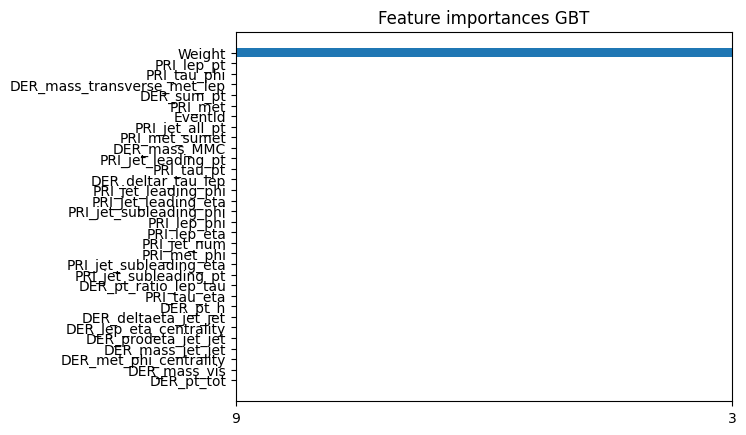

In [52]:
indices = np.argsort(gbt.feature_importances_)
plt.figure()
plt.title("Feature importances GBT")
plt.barh(np.arange(gbt.feature_importances_.shape[0]),
        gbt.feature_importances_[indices],
       align="center")
plt.xticks(range(gbt.feature_importances_.shape[0]), indices)
plt.yticks(range(gbt.feature_importances_.shape[0]),
          labels=higgs_labelless.columns[indices])
plt.xlim(0, 1)
plt.show()

> Figure 5: Graph showcasing the important features in the gbt model. Referencing figure 2, the gbt model was able to predict every particle in the trained data correctly. Here, the weight was the only relevant piece that the model needed, likely leading to the model realising after several generations that only the weight factor was needed to interpret the particles correctly, got 100% performance, and then reinforced that factor highlighting weight as the *only* feature with any relevance to classification.

# Task 8b: hyperparameters grid search
- Explore the parameter space with the sklearn module ```sklearn.model_selection.RandomizedSearchCV``` *fitting only those 4 features*

Follow this example to set up the parameter search. Set the estimators to 10 and 100, (the number of trees) and the max depth to 3, and 10, and None (let it be unconstrained). Set bootstrap to both True and False. Set the number of features to consider at every split to both "autp" and "sqrt". Use ```pprint``` like I did earlier in this notebook to print the parameters set

**this takes some computational time! so do not start this at the last minute!!**

In [ ]:
# choose your preferred values for the parameters you will test
random_grid = {...

In [ ]:
pprint(random_grid)


 mine and your best features do not necessarily have to be the same because our models may be different (different parameters, different random seed etc)

In [ ]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
# Random search of parameters, using 3 fold cross validation,
# search across 18 different combinations
random_search = RandomizedSearchCV(estimator = rf, param_distributions=random_grid,
                                   n_iter=1, cv=3)


Note that this may take a long time! It took 1 hour for me to run this. Dont start at the last minute!!

In [ ]:
random_search.fit(train_x[::5], train_y[::5])
# subselecting every 5th observation to reduce the computational time

In [ ]:
random_search.best_estimator_

In [ ]:
for k in random_search.best_params_:
  print(k,random_search.best_params_[k])

In [ ]:
rf = RandomForestClassifier(**random_search.best_params_)
pprint(rf.get_params())

In [ ]:
rf.fit(.....

In [ ]:
print("Tuned RF  Parameters: {}".format(random_search.best_params_))
print("Best score is {}".format(rf.score(test_x, test_y)))


In [ ]:
df = pd.DataFrame(random_search.cv_results_) # this shows the result for the given parameters
df

Plot a simple  ROC curve for the RF model with the best parameters found in the previous step. Describe it. Compare it with the GBT model from before

In [ ]:
# The random forest model by itself
y_pred_grd_rfcat = rf.predict_proba(test_x)[:, 1]
y_pred_grd_gbtcat = gbt.predict_proba(test_x)[:, 1]

fpr_rf, tpr_rf, _ = roc_curve(test_y.reshape(-1, 1).flatten()=="s", y_pred_grd_rfcat)
fpr_gbt, tpr_gbt, _ = roc_curve(test_y.reshape(-1, 1).flatten()=="s", y_pred_grd_gbtcat)

plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rf, tpr_rf, label='RF')
plt.plot(fpr_gbt, tpr_gbt, label='GBT')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()